In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/ml-latest-small/ratings.csv')
df.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

user_ratings = df.pivot(index='movie_id', columns='user_id', values='rating')

display(user_ratings.head())
display(user_ratings.shape)
user_ratings.describe()

user_id,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movie_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


(9066, 671)

user_id,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
count,20.000000,76.000000,51.000000,204.000000,100.000000,44.000000,88.000000,116.000000,45.000000,46.000000,...,58.000000,26.000000,519.000000,434.000000,40.000000,68.000000,20.000000,37.000000,31.000000,115.000000
mean,2.550000,3.486842,3.568627,4.348039,3.910000,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.285714,2.950000,3.647059,3.750000,3.351351,3.806452,3.917391
std,0.887041,0.901753,0.741752,0.947616,0.565775,1.241195,0.934017,0.794978,0.883062,0.915777,...,0.877390,0.452344,0.580913,0.947309,1.036513,0.842255,1.292692,0.919427,1.222548,0.763563
min,1.000000,1.000000,2.000000,1.000000,1.500000,0.500000,1.000000,0.500000,2.000000,2.000000,...,1.000000,3.000000,1.500000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,4.000000,3.500000,2.000000,3.000000,3.500000,3.000000,3.000000,...,3.000000,3.500000,3.500000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.500000
50%,2.500000,3.000000,3.500000,5.000000,4.000000,3.500000,3.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.250000,4.000000,5.000000,4.000000,5.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [2]:
%%time
from regression_model import normalized_fit

x, theta, means = normalized_fit(user_ratings.values, 2, 1)

feature_df = pd.DataFrame(x, index=user_ratings.index)

         Current function value: 28607.965695
         Iterations: 449
         Function evaluations: 900
         Gradient evaluations: 888
Wall time: 2min 58s


In [3]:
from math import sqrt
predicted = np.dot(x, theta.T) + means.reshape(-1, 1)

predicted_df = pd.DataFrame(predicted, index=user_ratings.index, columns=user_ratings.columns)

# error de entrada
rmse = sqrt(np.nanmean(np.square(predicted - user_ratings.values)))
print(rmse)
predicted_df.describe()

0.7383653793749274


user_id,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
count,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,...,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000
mean,3.037876,3.281211,3.229191,3.561254,3.425218,3.127445,3.214026,3.311516,3.256397,3.314962,...,3.279416,3.395955,3.396134,3.266564,3.134771,3.262389,3.245005,3.295941,3.231637,3.357512
std,0.981241,0.873547,0.878921,1.058110,0.909263,0.949670,0.947924,0.895413,0.886282,0.879394,...,0.873403,0.892879,0.893931,0.890836,0.915485,0.895275,0.923707,0.897633,0.941050,0.882117
min,-0.105885,0.499974,0.499973,-0.345229,0.499973,0.298917,0.499985,0.499993,0.499998,0.499996,...,0.499972,0.499989,0.499999,0.499927,0.499977,0.499996,0.499988,0.499992,0.499985,0.499983
25%,2.497620,2.867606,2.766768,3.000000,3.000000,2.500000,2.602393,2.866604,2.780587,2.910020,...,2.859723,3.000000,3.000000,2.841249,2.530219,2.777116,2.707319,2.832165,2.650700,2.999999
50%,3.000002,3.432775,3.344847,3.740088,3.572294,3.204619,3.342145,3.492913,3.398455,3.499976,...,3.429428,3.522904,3.512975,3.406867,3.195252,3.409102,3.381413,3.463833,3.367625,3.500000
75%,3.684514,3.908809,3.836533,4.326773,4.000000,3.845269,3.992636,3.999999,3.913687,3.980631,...,3.905085,4.000000,4.000000,3.902361,3.778400,3.944256,3.984765,3.999998,3.999967,4.000000
max,5.723619,5.000004,5.000001,6.176723,5.220876,5.009855,5.000007,5.000003,5.000001,5.000003,...,5.000004,5.063162,5.064999,5.040107,5.009268,5.000002,5.000005,5.000002,5.000006,5.000009


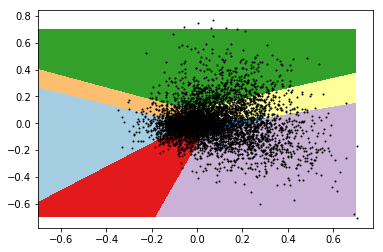

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
movie_df = pd.read_csv('datasets/ml-latest-small/movies.csv', index_col=0)


pca = PCA(n_components=2)
pca.fit(feature_df)

h = .001

feature_pca = pca.transform(feature_df)

feature_pca_df = pd.DataFrame(feature_pca)

kmeans = KMeans(8)
kmeans.fit(feature_pca_df)

x_min, x_max = feature_pca[:, 0].min() - 1, feature_pca[:, 0].max() + 1
y_min, y_max = feature_pca[:, 1].min() - 1, feature_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(-0.7, 0.7, -0.7, 0.7),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(feature_pca[:, 0], feature_pca[:, 1], 'k.', markersize=2)
# ax = feature_pca_df.plot(kind='scatter', x=0, y=1, figsize=(20,20))

In [14]:
import pickle

theta_df = pd.DataFrame(theta, index=user_ratings.columns)
x_df = pd.DataFrame(x, index=user_ratings.index)
means_df = pd.DataFrame(means, index=user_ratings.index)

with open('data/movielens_fit.p', 'wb') as fp:
    pickle.dump((user_ratings, x_df, theta_df, means_df), fp)


In [56]:
from scipy.sparse.linalg import svds
svd_df = user_ratings.copy()
means = np.nanmean(svd_df.values, axis=1).reshape(-1, 1)
svd_matrix = svd_df.values - np.nanmean(svd_df.values, axis=1).reshape(-1, 1)
svd_matrix = np.nan_to_num(svd_matrix)
U, s, Vt = svds(svd_matrix.T, k=500)
U.shape

(671, 500)

In [57]:
sigma = np.diag(s)
all_user_predicted_ratings = np.dot(U, np.dot(sigma, Vt)).T + means

all_user_predicted_ratings.shape
rmse = sqrt(np.nanmean(np.square(all_user_predicted_ratings - user_ratings.values)))
rmse

0.07039414238579594

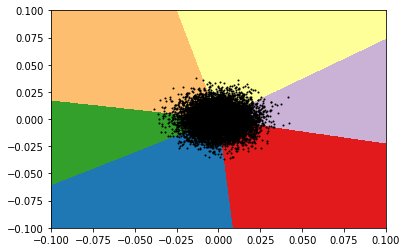

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
movie_df = pd.read_csv('datasets/ml-latest-small/movies.csv', index_col=0)

feature_df = pd.DataFrame(V, index=user_ratings.index)

pca = PCA(n_components=2)
pca.fit(feature_df)

h = .001

feature_pca = pca.transform(feature_df)

feature_pca_df = pd.DataFrame(feature_pca)

kmeans = KMeans(8)
kmeans.fit(feature_pca_df)

x_min, x_max = feature_pca[:, 0].min() - 1, feature_pca[:, 0].max() + 1
y_min, y_max = feature_pca[:, 1].min() - 1, feature_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(-0.1, 0.1, -0.1, 0.1),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(feature_pca[:, 0], feature_pca[:, 1], 'k.', markersize=2)
# ax = feature_pca_df.plot(kind='scatter', x=0, y=1, figsize=(20,20))